In [1]:
#Import Useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
#Loading data
df=pd.read_csv("IRIS.csv")

#show data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#Checking Duplicate values
duplicate=df.duplicated().sum()
print("Number of Duplicates: ",duplicate)

Number of Duplicates:  3


In [5]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [6]:
#Deleting Duplicates
df=df.drop_duplicates()

In [26]:
df['species'].unique()

array([0, 1, 2])

In [7]:
#Rechecking Dupicates
df.duplicated().sum()

0

Missing / Null Values

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Understanding Variables

In [9]:
#Dataset Describe
df.describe(include='all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.00,147.00,147.00,147.00,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.86,3.06,3.78,1.21,NaN
std,0.83,0.44,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.40,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


Unique Values in each column

In [10]:
for i in df.columns.tolist():
    print("Number of Unique values in ",i," is ",df[i].nunique())

Number of Unique values in  sepal_length  is  35
Number of Unique values in  sepal_width  is  23
Number of Unique values in  petal_length  is  43
Number of Unique values in  petal_width  is  22
Number of Unique values in  species  is  3


Data Visualization, Storytelling, Experiment with Charts : Understanding the relationships between Variables

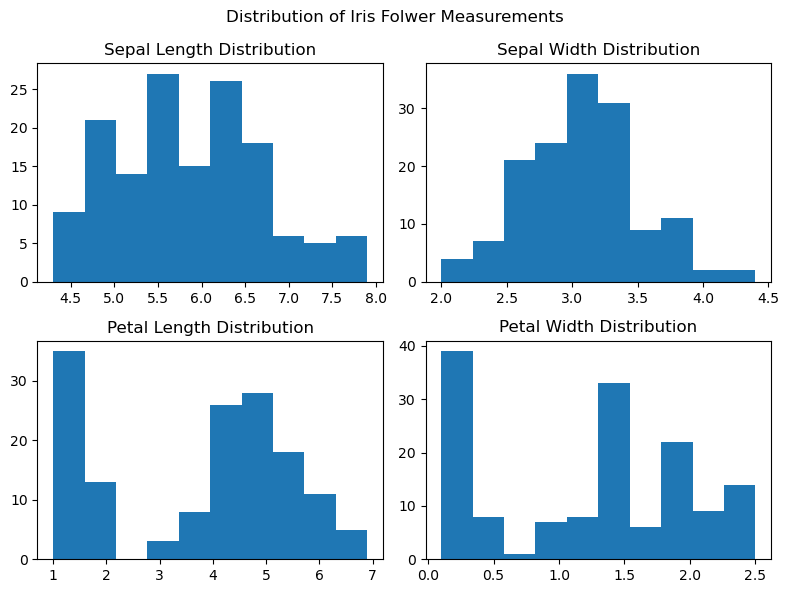

In [51]:
# Histogram Visualization for distribution of Numerical Variables
plt.figure(figsize=(8,6))
plt.suptitle("Distribution of Iris Folwer Measurements")

#Subplot 1
plt.subplot(2,2,1)
plt.hist(df['sepal_length'])
plt.title("Sepal Length Distribution")

#Subplot 2
plt.subplot(2,2,2)
plt.hist(df['sepal_width'])
plt.title("Sepal Width Distribution")

#Subplot 3
plt.subplot(2,2,3)
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')

#Subplot 4
plt.subplot(2,2,4)
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()

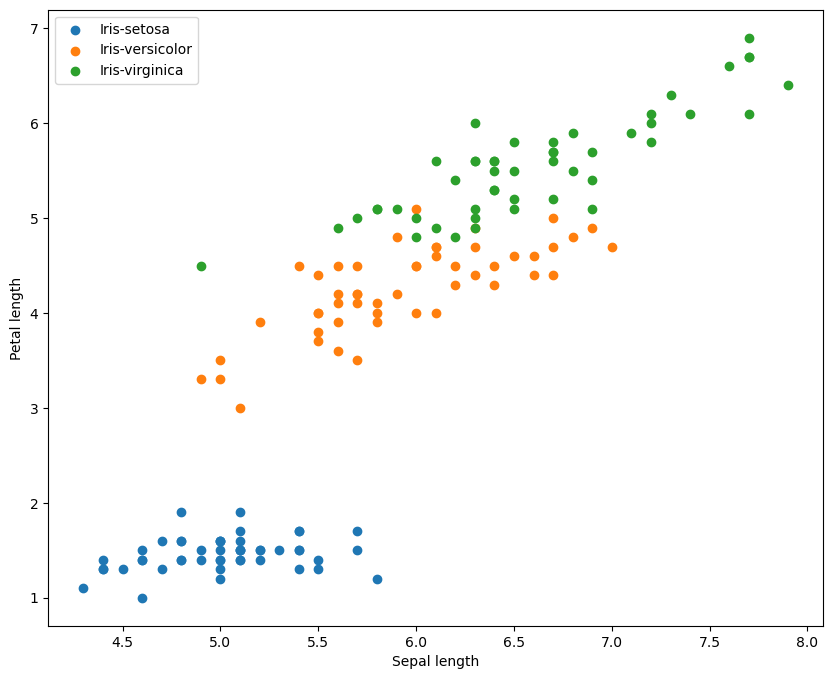

In [12]:
#Scatter plot Visualization for Sepal_length and petal_length
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

plt.figure(figsize=(10,8))
for i in range(3):
    x=df[df['species']== species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],label=species[i])

plt.xlabel("Sepal length")
plt.ylabel("Petal length")

plt.legend()
plt.show()

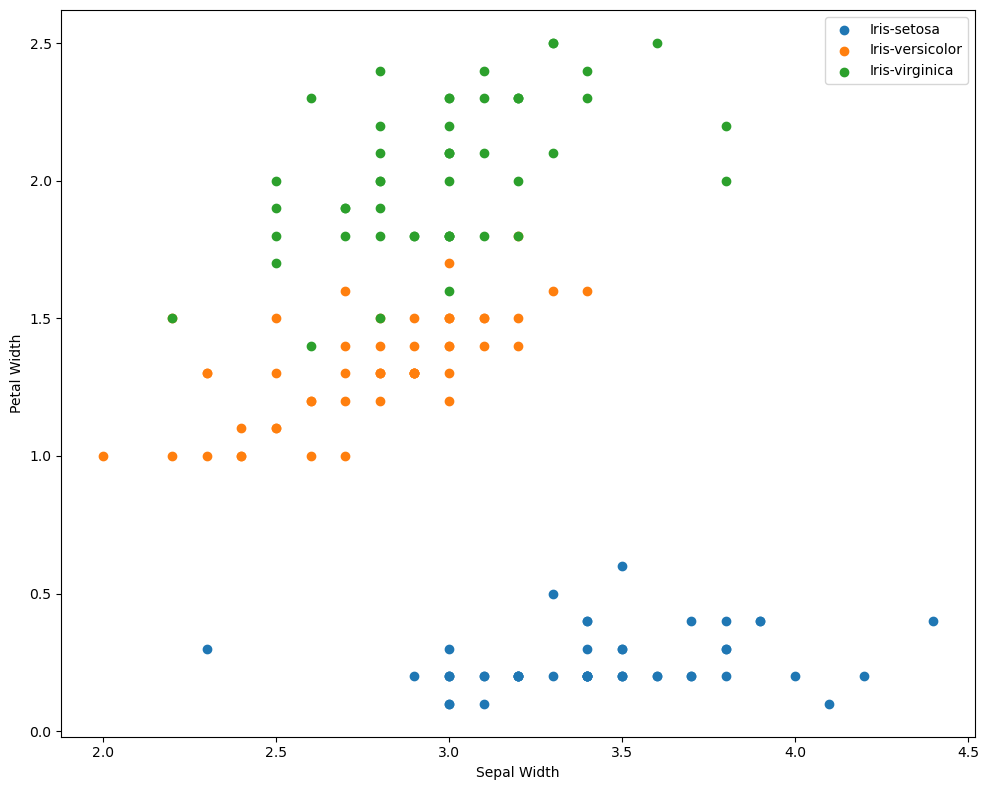

In [13]:
#Scatter plot visualization of Sepal Width vs petal Width
plt.figure(figsize=(10,8))
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],label=species[i])

plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.tight_layout()
plt.show()

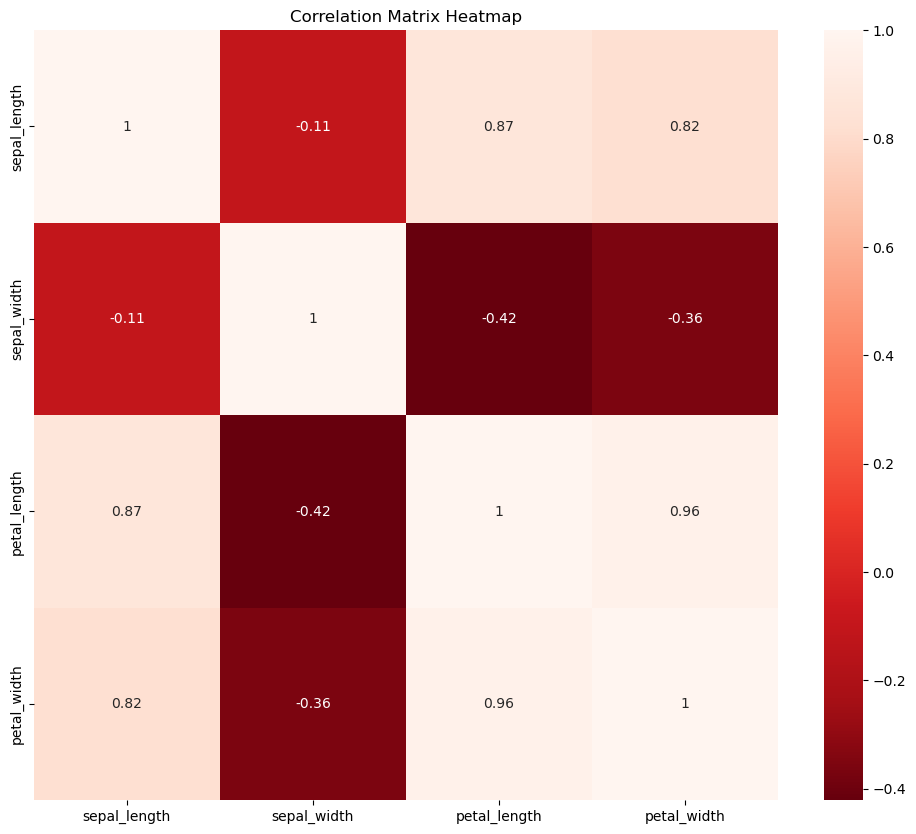

In [14]:
#Correlation HeatMap
corr_mat=df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr_mat,annot=True,cmap='Reds_r')
plt.title("Correlation Matrix Heatmap")
plt.show()

Categorical Engineering and Data Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder

#create LabelEncoder Object
lab_en=LabelEncoder()

#encoding species names into numerical values
df['species']=lab_en.fit_transform(df['species'])

#checking unique values
unique_species=df['species'].unique()

print("Encoded Species Values: ")
print(unique_species)

Encoded Species Values: 
[0 1 2]


In [16]:
#Data Scaling
x=df.drop(columns=['species'],axis=1)
y=df['species']

In [17]:
#Data Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

Train and Evalute Multiple Models

Model Comparision


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#creating dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.6f}")


Logistic Regression Accuracy: 1.000000
K-Nearest Neighbors Accuracy: 0.977778
Support Vector Machine Accuracy: 0.977778
Decision Tree Accuracy: 0.977778
Random Forest Accuracy: 0.955556


Train Logistic Regression Model


In [19]:
from  sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [20]:
# Model Prediction and Evalution
y_pred=model.predict(X_test)

print("Model Accuracy:\n ",accuracy_score(y_test,y_pred))
print("\nModel Classification Report: \n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))

Model Accuracy:
  1.0

Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[15  0  0]
 [ 0 19  0]
 [ 0  0 11]]


<Figure size 1000x600 with 0 Axes>

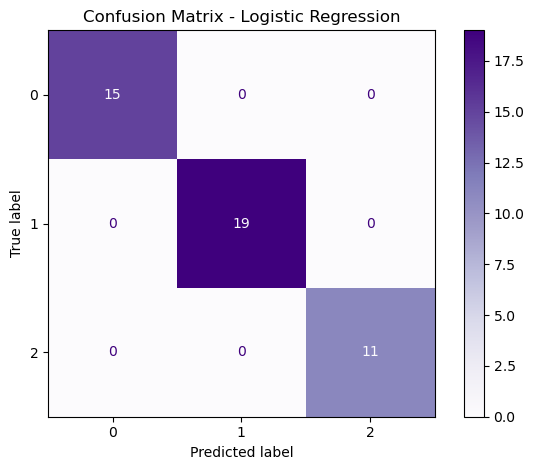

In [22]:
# Visualize Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()



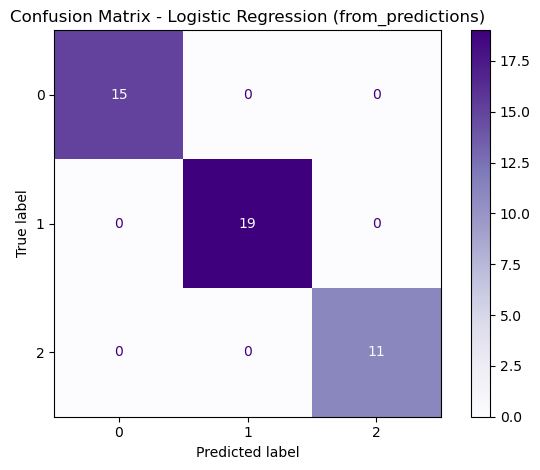

In [23]:
# Visualize Confusion Matrix using predicted labels (from_predictions)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression (from_predictions)")
plt.tight_layout()
plt.show()